<center>
    <div style="color: Black; background-color: #4682B4;padding: 1px; border-radius: 1px;font-family: Garamond;">
    <font size = "6">
        <h3><b>Exploração do TAD Lista com implementação de listas ligadas</b></h3>
    </font>
    </div>    
<center>

 - **Trabalho realizado por**:
Nomes   | Número
:--------- | :------:
Diogo Alexandre Alonso De Freitas | 104841
Pedro Brígido Machado | 98601
Inês Maria Carvalho Silva | 104912

Este trabalho teve como objetivo explorar as representações do TAD Lista em Python e os algoritmos de pesquisa e de
ordenamento.
Na realização deste trabalho, o nosso grupo optou por escolher a opção c) (opção com valoração superior) em que era necessário construir 2 TAD Listas, sendo uma a duplamente ligada e a outra a duplamente ligada e circular.
É necessário referir que, apesar de o grupo ter conhecimento de que apenas era necessário escolher dois dos algoritmos de ordenação, o grupo optou por realizar todos os algoritmos, com o objetivo de obter um maior conhecimento sobre o assunto.

In [1]:
# Obter vários outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import timeit
import random
import matplotlib.pyplot as plt
import timeit
from IPython.display import Image

<center>
    <div style="color: Black; background-color: #4682B4;padding: 1px; border-radius: 1px;font-family: Garamond;">
    <font size = "4">
        <h3><b>1 - TAD Lista: implementações</b></h3>
    </font>
    </div>    
<center>

<div style="color: Black;padding: 1px; float:left;border-radius: 1px;font-family: Garamond;">
    <font size = "3">
        <h3><b>- Nó</b></h3>
    </font>
</div>

In [2]:
class NewNode:
    # O construtor possui 2 variáveis, onde um apontará para o valor seguinte (next) e o valor anterior (prev)
    def __init__(self, data, prev, next):
        self.__data = data
        self.__prev = prev
        self.__next = next

    @property
    def data(self):
        return self.__data

    @property
    def prev(self):
        return self.__prev

    @property
    def next(self):
        return self.__next

    @data.setter
    def data(self, new_data):
        self.__data = new_data

    @prev.setter
    def prev(self, new_prev):
        self.__prev = new_prev

    @next.setter
    def next(self, new_next):
        self.__next = new_next


<div style="color: Black;padding: 1px; float:left;border-radius: 1px;font-family: Garamond;">
    <font size = "3">
        <h3><b>- Lista duplamente ligada</b></h3>
    </font>
</div>

![](https://wiki.sj.ifsc.edu.br/images/2/2b/Lista-dupla.png)

Uma lista duplamente ligada é uma coleção de nós, cada um contendo dois ponteiros que apontam para o nó anterior (prev) e outro que aponta para o próximo nó (next) , formado assim a lista.
O primeiro nó na lista denomina-se cabeça (head) e o último cauda (tail).

In [56]:
class ListaDL:

    def __init__(self):
        self.__head = NewNode(None, None, None) # ponteiro para o primeiro elemento da lista (head) 
        self.__tail = NewNode(None, None, None) # ponteiro para o último elemento da lista (tail)
        self.__head.next = self.__tail
        self.__tail.prev = self.__head
        self.__size = 0 # Tamanho da lista (Número de elementos)
        
    @property
    def head(self):
        return self.__head.data

    @property
    def tail(self):
        return self.__tail.data

    @property
    def is_empty(self):
        return self.__size == 0
    
    def __len__(self):
        return self.__size
    
    def remove_all(self):
        self.__head = NewNode(None, None, None)
        self.__tail = NewNode(None, None, None)
        self.__head.next =self.__tail
        self.__tail.prev = self.__head
        self.__size = 0
        
    def insert_first(self, value):
        node = NewNode(value, None, None)
        if self.__size == 0:
            self.__head = node
            self.__size += 1
        elif self.__size == 1:
            if self.__head.data != None:
                self.__tail = self.__head
            self.__head = self.__tail.prev = node
            self.__head.next = self.__tail
            self.__size += 1
        else:
            head = self.__head
            self.__head = node
            node.next = head
            head.prev = node
            self.__size += 1
            
    def __getitem__(self, index):
        if type(index) == int:
            if - self.__size > index or index >= self.__size:
                raise IndexError('list index out of range')
            if index < 0:
                perc = self.__tail
                count = -1
                while count > index:
                    perc = perc.prev
                    count -= 1
            else:
                perc = self.__head
                count = 0
                while count < index:
                    perc = perc.next
                    count += 1
            return perc
        else:
            if index.step == None:
                step = 1
            else:
                step = index.step
            if index.start == None:
                start = 0
            else:
                start = index.start
            if index.stop == None:
                stop = self.__size
            else:
                stop = index.stop
            if 0 > start or start >= self.__size or 0 > stop or stop > self.__size:
                raise IndexError('list index out of range')
            lista = ListaDL()
            perc = self.__head
            count = 0
            while count < start:
                perc = perc.next
                count += 1
            count_step = 0
            while count < stop:
                if count_step % step == 0:
                    lista.insert_last(perc.data)
                perc = perc.next
                count += 1
                count_step += 1
            return lista

    def __add__(self, other):
        list = ListaDL()
        for i in range(self.__size):
            list.insert_last(self[i].data)
        for i in range(other.__size):
            list.insert_last(other[i].data)
        return list

    def __str__(self):
        txt = '['
        perc = self.__head
        count = 0
        while count <= self.__size - 1:
            txt += str(perc.data)
            txt += ', '
            perc = perc.next
            count += 1
        if txt[-1] == ' ':
            txt = txt[:-2]
        txt += ']'
        return txt
    
    def insert_last(self, value):
        node = NewNode(value, None, None)
        if self.__size == 0:
            self.insert_first(value)
        elif self.__size == 1:
            if self.__tail.data != None:
                self.__head = self.__tail
            self.__tail = self.__head.next = node
            self.__tail.prev = self.__head
            self.__size += 1
        else:
            tail = self.__tail
            self.__tail = node
            node.prev = tail
            tail.next = node
            self.__size += 1
            
    def remove_value(self, value):
        if self.__size == 0:
            raise ValueError('value not found')
        perc = self.__head
        count = 0
        while count <= self.__size - 1 and perc.data != value:
            perc = perc.next
            count += 1
        if count == self.__size:
            raise ValueError('value not found')
        self.remove_index(count)
        
    def remove_index(self, index):
        if self.__size == 0:
            raise IndexError('list index out of range')
        elif index == 0:
            self.delete_first()
            return
        elif index == self.__size - 1:
            self.delete_last()
            return
        else:
            x = self.__head
            count = 0
            while count < index - 1:
                x = x.next
                count += 1
            aux = x.next
            x.next = aux.next
            aux.next.prev = x
        self.__size -= 1
        
    def delete_first(self):
        if self.__size == 0:
            raise IndexError('list index out of range')
        head = self.__head
        self.__head = head.next
        self.__head.prev = None
        self.__size -= 1
    
    def delete_last(self):
        if self.__size == 0:
            raise IndexError('list index out of range')
        tail = self.__tail
        self.__tail = tail.prev
        self.__tail.next = None
        self.__size -= 1
        
    def find_value(self, value):
        perc = self.__head
        count = 0
        while count < self.__size:
            if perc.data == value:
                return count
            perc = perc.next
            count += 1
        raise ValueError('value not found')
        
    def binary_search(self, value):
        #self.merge_sort()
        low = 0
        high = self.__size - 1
        while low <= high:
            mid = (high + low) // 2
            if self[mid].data < value:
                low = mid + 1
            elif self[mid].data > value:
                high = mid - 1
            else:
                return mid
        raise ValueError('value not found')
        
    def exists(self, value):
        perc = self.__head
        count = 0
        while count < self.__size:
            if perc.data == value:
                return True
            perc = perc.next
            count += 1
        return False
    
    def count_value(self, value):
        count = 0
        index = 0
        perc = self.__head
        while index < self.__size:
            if perc.data == value:
                count += 1
            perc = perc.next
            index += 1
        return count
    
    def merge_sort(self):
        if self.__size > 1:
            left_lista = self[:self.__size // 2]
            right_lista = self[self.__size // 2:]
            left_lista.merge_sort()
            right_lista.merge_sort()
            l_index = 0
            r_index = 0
            m_index = 0
            while l_index < left_lista.__size and r_index < right_lista.__size:
                if left_lista[l_index].data < right_lista[r_index].data:
                    self[m_index].data = left_lista[l_index].data
                    l_index += 1
                else:
                    self[m_index].data = right_lista[r_index].data
                    r_index += 1
                m_index += 1
            while l_index < left_lista.__size:
                self[m_index].data = left_lista[l_index].data
                l_index += 1
                m_index += 1
            while r_index < right_lista.__size:
                self[m_index].data = right_lista[r_index].data
                r_index += 1
                m_index += 1
                
    def quick_sort(self):
        if self.__size <= 1:
            return
        else:
            comp = self[self.__size - 1]
            list = self[:self.__size - 1]
        lower_list = ListaDL()
        greater_list = ListaDL()
        for i in range(list.__size):
            if list[i].data <= comp.data:
                lower_list.insert_last(list[i].data)
            else:
                greater_list.insert_last(list[i].data)
        self.remove_all()
        lower_list.quick_sort()
        comp_list = ListaDL()
        comp_list.insert_first(comp.data)
        greater_list.quick_sort()
        lista = lower_list + comp_list + greater_list
        self.__size = lista.__size
        self.__head = lista.__head
        self.__tail = lista.__tail

    def insertion_sort(self):
        for i in range(1, self.__size):
            r = i
            while r > 0 and self[r].data < self[r - 1].data:
                self[r].data, self[r - 1].data = self[r - 1].data, self[r].data
                r -= 1

    def bubble_sort(self):
        for i in range(self.__size - 1, 0, -1):
            for r in range(i):
                if self[r].data > self[r + 1].data:
                    self[r].data, self[r + 1].data = self[r + 1].data, self[r].data

In [57]:
DL = ListaDL()
print(DL.is_empty)
print(DL)

True
[]


In [58]:
DL.insert_first(98)
DL.insert_first(32)
DL.insert_first(76)
DL.insert_first(190)
DL.insert_last(1)
DL.insert_last(10)
DL.insert_last(9)
DL.insert_last(45)
print(DL)
print(DL.is_empty)

[190, 76, 32, 98, 1, 10, 9, 45]
False


In [13]:
DL.remove_index(5)
DL.delete_first()
DL.delete_last()
print(DL)

[76, 32, 98, 1, 9]


In [14]:
DL.head
DL.tail

76

9

In [15]:
DL.exists(32)
DL.count_value(32)
print(DL)

True

1

[76, 32, 98, 1, 9]


In [16]:
DL.merge_sort()
print(DL)

[1, 9, 32, 76, 98]


<div style="color: Black;padding: 1px; float:left;border-radius: 1px;font-family: Garamond;">
    <font size = "3">
        <h3><b>- Lista duplamente ligada e circular</b></h3>
    </font>
</div>

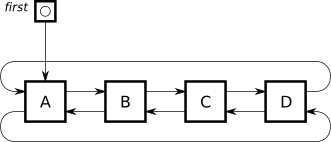

A lista duplamente ligada e circular possui a mesma estrutura de uma lista duplamente ligada, mas a head aponta para a tail e a tail aponta para a Head

In [32]:
class ListaDLC:

    def __init__(self):
        self.__head = NewNode(None, None, None)
        self.__tail = NewNode(None, None, None)
        self.__head.next = self.__head.prev = self.__tail
        self.__tail.prev = self.__tail.next = self.__head
        self.__size = 0

    @property
    def head(self):
        return self.__head.data

    @property
    def tail(self):
        return self.__tail.data

    @property
    def is_empty(self):
        return self.__size == 0
    
    def __len__(self):
        return self.__size
    
    def remove_all(self):
        self.__head = NewNode(None, None, None)
        self.__tail = NewNode(None, None, None)
        self.__head.next = self.__head.prev = self.__tail
        self.__tail.prev = self.__tail.next = self.__head
        self.__size = 0

    def insert_first(self, value):
        node = NewNode(value, None, None)
        if self.__size == 0:
            self.__head = node
            self.__size += 1
        elif self.__size == 1:
            if self.__head.data != None:
                self.__tail = self.__head
            self.__head = self.__tail.next = self.__tail.prev = node
            self.__head.prev = self.__head.next = self.__tail
            self.__size += 1
        else:
            head = self.__head
            self.__head = node
            node.next = head
            head.prev.next = node
            head.prev, node.prev = node, head.prev
            self.__size += 1
            
    def __getitem__(self, index):
        if type(index) == int:
            if - self.__size > index or index >= self.__size:
                raise IndexError('list index out of range')
                count = -1
                while count > index:
                    perc = perc.prev
                    count -= 1
            else:
                perc = self.__head
                count = 0
                while count < index:
                    perc = perc.next
                    count += 1
            return perc
        else:
            if index.step == None:
                step = 1
            else:
                step = index.step
            if index.start == None:
                start = 0
            else:
                start = index.start
            if index.stop == None:
                stop = self.__size
            else:
                stop = index.stop
            if 0 > start or start >= self.__size or 0 > stop or stop > self.__size or 0 > step or step >= self.__size:
                raise IndexError('list index out of range')
            lista = ListaDLC()
            perc = self.__head
            count = 0
            while count < start:
                perc = perc.next
                count += 1
            while count < stop:
                if count % step == 0:
                    lista.insert_last(perc.data)
                perc = perc.next
                count += 1
            return lista
    
    def __add__(self, other):
        list = ListaDLC()
        for i in range(self.__size):
            list.insert_last(self[i].data)
        for i in range(other.__size):
            list.insert_last(other[i].data)
        return list

    def __str__(self):
        txt = '['
        perc = self.__head
        count = 0
        while count <= self.__size - 1:
            if perc.data == None:
                perc = self.__tail
            txt += str(perc.data)
            txt += ', '
            perc = perc.next
            count += 1
        if txt[-1] == ' ':
            txt = txt[:-2]
        txt += ']'
        return txt

    def insert_last(self, value):
        node = NewNode(value, None, None)
        if self.__size == 0:
            self.__head = node
            self.__size += 1
        elif self.__size == 1:
            if self.__tail.data != None:
                self.__head = self.__tail
            self.__tail = self.__head.next = self.__head.prev = node
            self.__tail.prev = self.__tail.next = self.__head
            self.__size += 1
        else:
            tail = self.__tail
            self.__tail = node
            node.prev = tail
            tail.next.prev = node
            tail.next, node.next = node, tail.next
            self.__size += 1
            
    def remove_value(self, value):
        if self.__size == 0:
            raise ValueError('value not found')
        perc = self.__head
        count = 0
        while count <= self.__size - 1 or perc.data != value:
            perc = perc.next
            count += 1
        if count == self.__size:
            raise ValueError('value not found')
        self.remove_index(count)

    def remove_index(self, index):
        if self.__size == 0:
            raise IndexError('list index out of range')
        elif index == 0:
            self.delete_first()
            return
        elif index == self.__size - 1:
            self.delete_last()
            return
        else:
            perc = self.__head
            count = 0
            while count < index - 1:
                perc = perc.next
                count += 1
            perc.prev.next = perc.next
            perc.next.prev = perc.prev
        self.__size -= 1

    def delete_first(self):
        if self.__size == 0:
            raise IndexError('list index out of range')
        if self.__size == 1:
            self.__head = NewNode(None, None, None)
            self.__size -= 1
            return
        head = self.__head
        head.next.prev = head.prev
        head.prev.next = head.next
        self.__head = head.next
        self.__size -= 1

    def delete_last(self):
        if self.__size == 0:
            raise IndexError('list index out of range')
        if self.__size == 1:
            self.delete_first()
            return
        tail = self.__tail
        tail.next.prev = tail.prev
        tail.prev.next = tail.next
        self.__tail = tail.prev
        self.__size -= 1

    def find_value(self, value):
        perc = self.__head
        count = 0
        while count < self.__size:
            if perc.data == value:
                return count
            perc = perc.next
            count += 1
        raise ValueError('value not found')
        
    def binary_search(self, value):
        #self.merge_sort()
        low = 0
        high = self.__size - 1
        while low <= high:
            mid = (high + low) // 2
            if self[mid].data < value:
                low = mid + 1
            elif self[mid].data > value:
                high = mid - 1
            else:
                return mid
        raise ValueError('value not found')

    def exists(self, value):
        perc = self.__head
        count = 0
        while count < self.__size:
            if perc.data == value:
                return True
            perc = perc.next
            count += 1
        return False

    def count_value(self, value):
        count = 0
        index = 0
        perc = self.__head
        while index < self.__size:
            if perc.data == value:
                count += 1
            perc = perc.next
            index += 1
        return count

    def merge_sort(self):
        if self.__size > 1:
            left_lista = self[:self.__size // 2]
            right_lista = self[self.__size // 2:]
            left_lista.merge_sort()
            right_lista.merge_sort()
            l_index = 0
            r_index = 0
            m_index = 0
            while l_index < left_lista.__size and r_index < right_lista.__size:
                if left_lista[l_index].data < right_lista[r_index].data:
                    self[m_index].data = left_lista[l_index].data
                    l_index += 1
                else:
                    self[m_index].data = right_lista[r_index].data
                    r_index += 1
                m_index += 1
            while l_index < left_lista.__size:
                self[m_index].data = left_lista[l_index].data
                l_index += 1
                m_index += 1
            while r_index < right_lista.__size:
                self[m_index].data = right_lista[r_index].data
                r_index += 1
                m_index += 1

    def bubble_sort(self):
        for i in range(self.__size - 1, 0, -1):
            for r in range(i):
                if self[r].data > self[r + 1].data:
                    self[r].data, self[r + 1].data = self[r + 1].data, self[r].data
                    
    def quick_sort(self):
        if self.__size <= 1:
            return
        else:
            comp = self.__tail
            list = self[:self.__size - 1]
        lower_list = ListaDLC()
        greater_list = ListaDLC()
        for i in range(list.__size):
            if list[i].data <= comp.data:
                lower_list.insert_last(list[i].data)
            else:
                greater_list.insert_last(list[i].data)
        self.remove_all()
        lower_list.quick_sort()
        comp_list = ListaDLC()
        comp_list.insert_first(comp.data)
        greater_list.quick_sort()
        lista = lower_list + comp_list + greater_list
        self.__size = lista.__size
        self.__head = lista.__head
        self.__tail = lista.__tail

    def insertion_sort(self):
        for i in range(1, self.__size):
            r = i
            while r > 0 and self[r].data < self[r - 1].data:
                self[r].data, self[r - 1].data = self[r - 1].data, self[r].data
                r -= 1

In [33]:
DLC = ListaDLC()
print(DLC.is_empty)
print(DLC)

True
[]


In [34]:
DLC.insert_first(98)
DLC.insert_first(32)
DLC.insert_first(76)
DLC.insert_first(190)
DLC.insert_last(1)
DLC.insert_last(10)
DLC.insert_last(9)
DLC.insert_last(45)
print(DLC)
print(DLC.is_empty)

[190, 76, 32, 98, 1, 10, 9, 45]
False


In [35]:
DLC.head
DLC.tail

190

45

In [36]:
DLC.remove_index(5)
DLC.delete_first()
DLC.delete_last()
print(DLC)

[76, 32, 98, 10, 9]


In [37]:
DLC.exists(32)
DLC.count_value(32)

True

1

In [38]:
DLC.merge_sort()
print(DLC)

[9, 10, 32, 76, 98]


<center>
    <div style="color: Black; background-color: #4682B4;padding: 1px; border-radius: 1px;font-family: Garamond;">
        <font size = "4">
        <h3><b>2 - Análise da complexidade de algoritmos</b></h3>
        </font>
    </div>    
<center>

<div style="color: Black;float:left;font-family: Garamond;">
    <font size = "3">
        <h3><b>- Algoritmo de Pesquisa Linear VS Algoritmo de Pesquisa Binária</b></h3>
    </font>
</div>

In [44]:
def creat_random_list_DL(length):
    lista = list(range(length))
    random.shuffle(lista)
    x = ListaDL()
    for i in lista:
        x.insert_last(i)
    return x

def creat_random_list_DLC(length):
    lista = list(range(length))
    random.shuffle(lista)
    x = ListaDLC()
    for i in lista:
        x.insert_last(i)
    return x


def timeit_search_DLC(n_elements):
        print('Binary Search:', sum(timeit.repeat(stmt = 'x.binary_search(val)', 
                                                  setup=f'x = creat_random_list_DLC({n_elements});x.merge_sort();val = random.randint(0, {n_elements - 1})', 
                                                  globals=globals(), number=1, repeat=50)) / 50)
        print('linear Search:', sum(timeit.repeat(stmt = 'x.find_value(val)', 
                                                  setup=f'x = creat_random_list_DLC({n_elements});x.merge_sort();val = random.randint(0, {n_elements-1})', 
                                                  globals=globals(), number=1, repeat=50)) / 50)
        
def timeit_search_DL(n_elements):
        print('Binary Search:', sum(timeit.repeat(stmt = 'x.binary_search(val)', 
                                                  setup=f'x = creat_random_list_DL({n_elements});x.merge_sort();val = random.randint(0, {n_elements - 1})', 
                                                  globals=globals(), number=1, repeat=50)) / 50)
        print('linear Search:', sum(timeit.repeat(stmt = 'x.find_value(val)', 
                                                  setup=f'x = creat_random_list_DL({n_elements});x.merge_sort();val = random.randint(0, {n_elements-1})', 
                                                  globals=globals(), number=1, repeat=50)) / 50)

In [45]:
print("Lista Duplamente Ligada e Circular: ")
timeit_search_DLC(100)
print()
print("Lista Duplamente Ligada: ")
timeit_search_DL(100)

Lista Duplamente Ligada e Circular: 
Binary Search: 7.207799999378039e-05
linear Search: 1.3499999968189513e-05

Lista Duplamente Ligada: 
Binary Search: 6.701199998133234e-05
linear Search: 1.6065999980128253e-05


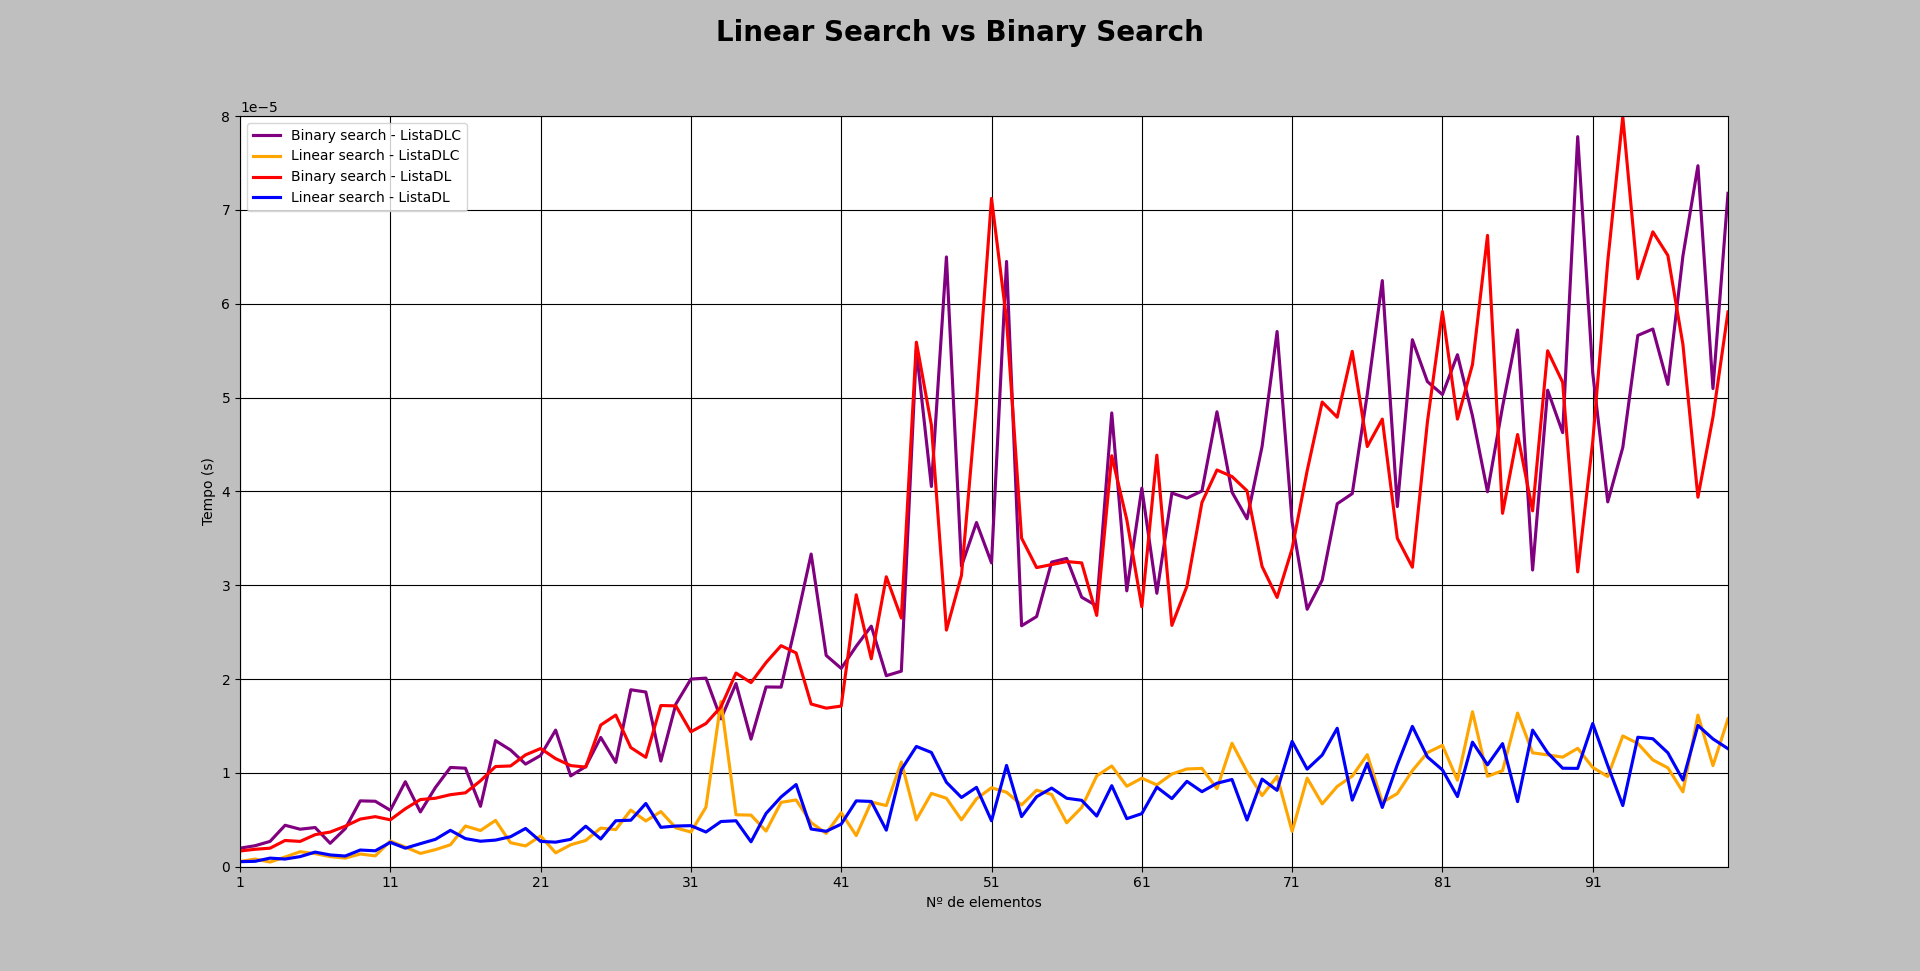<img src="Linear_vs_binary.png">

<div style="color: Black;padding: 1px; float:center;border-radius: 1px;font-family: Garamond;">
    <font size = "2">
        <h3><b>Conclusão: </b></h3>
    </font>
</div>

A lista dinâmica tem a desvantagem de não conseguir obter um dado item dando um Índice e, devido a isso, o binary search fica mais lento que o linear search, pois, é necessário realizar um linear search dentro do próprio binary search para conseguir obter o elemento que está a meio da lista.
Visionando o gráfico a cima, é possivel verificar que, quanto mais elementos os dois tipos de TAD lista têm, o binary search vai ficando muito mais lento quando comparado com o linear search.
Podemos assim concluir que, nestes casos, é mais produtivo usar o linear seach já que ficamos impossibilitados de obter diretamente o indice.

Caso utilizemos uma lista "normal" do python, as chamadas **list**, é mais produtivo utilizar o binary search, já que esse tipo de lista permite obter um dado item numa posição dando o index.

<div style="color: Black;padding: 1px; float:left;border-radius: 1px;font-family: Garamond;">
    <font size = "4">
        <h3><b>- Algoritmos de ordenação - complexidade</b></h3>
    </font>
</div>

<div style="color: Black;padding: 1px; float:center;border-radius: 1px;font-family: Garamond;">
    <font size = "2">
        <h3><b>Ocupação de tempo – T(n) </b></h3>
    </font>
</div>

De seguida, calculamos, em média, os tempos de todos os tipos de ordenação nos 2 tipos de TAD lista.
Inicialmente criamos uma função, em cada tipo de TAD lista que gerava uma lista com elementos aleatórios, com valores entre 0 e 1000.
De seguida, usando a biblioteca timeit, que nos possibilitou calcular o tempo que a ordenação da lista demorava, fizemos 25 repetições em cada tipo de ordenação e calculamos a média, e obtive-mos os seguintes resultados:

In [49]:
def timeit_sort_DL(elemento):
    print('Merge Sort:', sum(timeit.repeat(stmt = 'x.merge_sort()', setup=f'x = creat_random_list_DL({elemento})', globals=globals(), number=1, repeat=25)) / 25)
    print('Quick Sort', sum(timeit.repeat(stmt = 'x.quick_sort()', setup=f'x = creat_random_list_DL({elemento})', globals=globals(), number=1, repeat=25)) / 25)
    print('Insertion Sort:', sum(timeit.repeat(stmt = 'x.insertion_sort()', setup=f'x = creat_random_list_DL({elemento})', globals=globals(), number=1, repeat=25)) / 25)
    print('Bubble Sort:', sum(timeit.repeat(stmt = 'x.bubble_sort()', setup=f'x = creat_random_list_DL({elemento})', globals=globals(), number = 1, repeat = 25))/25)

def timeit_sort_DLC(elemento):
    print('Merge Sort:', sum(timeit.repeat(stmt = 'x.merge_sort()', setup=f'x = creat_random_list_DLC({elemento})', globals=globals(), number=1, repeat=25)) / 25)
    print('Quick Sort', sum(timeit.repeat(stmt = 'x.quick_sort()', setup=f'x = creat_random_list_DLC({elemento})', globals=globals(), number=1, repeat=25)) / 25)
    print('Insertion Sort:', sum(timeit.repeat(stmt = 'x.insertion_sort()', setup=f'x = creat_random_list_DLC({elemento})', globals=globals(), number=1, repeat=25)) / 25)
    print('Bubble Sort:', sum(timeit.repeat(stmt = 'x.bubble_sort()', setup=f'x = creat_random_list_DLC({elemento})', globals= globals(), number = 1, repeat = 25))/25)


In [50]:
# Lista Duplamente Ligada
print("Lista Duplamente Ligada: \n")
timeit_sort_DL(150)

Lista Duplamente Ligada: 

Merge Sort: 0.012089088000011542
Quick Sort 0.021210748000048626
Insertion Sort: 0.3372677359999943
Bubble Sort: 0.37907799200000225


In [51]:
# Lista Duplamente Ligada e Circular
print("Lista Duplamente Ligada e Circular: \n")
timeit_sort_DLC(150)

Lista Duplamente Ligada e Circular: 

Merge Sort: 0.012016159999984666
Quick Sort 0.02195131600001332
Insertion Sort: 0.32249121200000447
Bubble Sort: 0.3908212480000111


De seguida, construi-mos gráficos para podermos analisar e retirar conclusões melhores sobre os algoritmos de ordenação

![](ListaDL.png)

![](ListaDLC.png)

Visionando os valores e os gráfico, é notório que o Merge Sort é o tipo de ordenação mais rápido (graças á sua complexidade que é sempre O(n log n)) e que o Bubble Sort é o tipo de ordenação mais lento (graças á sua complexidade que é sempre O(n^2))
Podemos assim ver na tabela abaixo como se comporta o grau de complexidade dos diferentes tipos de ordenação apresentados:

Algoritmos de ordenação | Best Case | Average Case | Worst Case
:--: | :--: | :--: | :--:
Merge_sort | O(n log n) | O(n log n) | O(n log n)
Quick Sort | O(n log n) | O(n log n) | O(n^2)
Insertion Sort | O(n) | O(n^2) | O(n^2)
Bubble Sort | O(n^2) | O(n^2) | O(n^2)

De seguida, criámos 2 gráficos da lista duplamente ligada, com o objetivo de comparar os dois algoritmos de ordenação aparentemente mais rápidos, o quick sort e o merge sort

![](quick_sort.png)

![](merge_sort.png)

Ao analisar-mos corretamente os dois gráfico acima, é notório que o merge sort, não só é mais constante, como também é mais rápido que o quick sort e, por esse mesmo motivo, sempre que era necessário organizar uma lista (para o binary search, por exemplo) utilizamos sempre o merge sort.
É importante referir que, apesar do merge sort possuir o grau de complexidade mais eficiente, ele não é o melhor método de ordenação para as listas com poucos elementos. Para listas mais pequenas, o insertion Sort é o que se sai melhor, como é possivel visionar a baixo:

In [61]:
# Lista Duplamente Ligada
print("Lista Duplamente Ligada: \n")
timeit_sort_DL(8)

Lista Duplamente Ligada: 

Merge Sort: 0.00012449199999537086
Quick Sort 0.00022801600000093458
Insertion Sort: 8.589999997639097e-05
Bubble Sort: 0.00011633999996774946


In [62]:
# Lista Duplamente Ligada e Circular
print("Lista Duplamente Ligada e Circular: \n")
timeit_sort_DLC(8)

Lista Duplamente Ligada e Circular: 

Merge Sort: 0.00012843599999541765
Quick Sort 0.00021842000001925043
Insertion Sort: 0.0001043279999794322
Bubble Sort: 0.00012072399998942273


Para concluir esta parte, e relacionar com as implementações da TAD lista, podemos verificar que é mais demorado ordenar a lista duplamente ligada e circular, possivelmente, por esta ter a caracteristica de ser circular (a head e a tail estão ligadas), como demonstra o gráfico a baixo:

![](Comparacao_DL_DLC.png)

<div style="color: Black;padding: 1px; float:center;border-radius: 1px;font-family: Garamond;">
    <font size = "2">
        <h3><b>Ocupação de espaço dos métodos de ordenação – S(n)</b></h3>
    </font>
</div>

A Ocupação de espaço, nomeadamente, o S(n), é a “memória” utilizada pelo algoritmo para execução da tarefa, medida em função do tamanho n do input.
Para conseguirmos saber a ocupação do espaço deste é necessário contar a quantidade de células de memória, array e de variáveis auxiliares.

- Merge Sort: S(n) = n + 5

- Quick Sort: S(n) = n + 7

- Insertion Sort: S(n) = n + 2

- Bubble Sort: S(n) = n + 2

Visionando a ocupação do espaço em cima, é notório que, os métodos de ordenação mais lentos, nomeadamente, o bubble_sort e o insertion_sort, são os que ocupam menos espaço.
O método de ordenação que ocupa mais espaço é o quicksort.

<div style="color: Black;padding: 1px; float:center;border-radius: 1px;font-family: Garamond;">
    <font size = "2">
        <h3><b>Ocupação de espaço das duas implementações do TAD Lista – S(n)</b></h3>
    </font>
</div>

Ao analisar-mos o construtor das duas TAD listas, podemos perceber que a ListaDLC ocupa mais espaço que a ListaDL. Isto ocorre, pois, no construtor da ListaDLC, a head guarda o nó da tail como nó anterior e a tail guarda o nó da head como próximo nó.
Apesar de ser uma diferença de espaço muito pequena, esta diferença existe

<center>
    <div style="color: Black; background-color: #4682B4;padding: 1px; border-radius: 1px;font-family: Garamond;">
        <font size = "4">
            <h3><b>Notas Finais</b></h3>
        </font>
    </div>    
<center>